# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [11]:
x_train = pd.read_csv('x_train.csv',sep=',')
x_test = pd.read_csv('x_test.csv',sep=',')

In [13]:
y_train = pd.read_csv('y_train.txt', sep=" ",header=None)
y_train.columns = ['atividade']

In [14]:
y_test = pd.read_csv('y_test.txt', sep=" ",header=None)
y_test.columns = ['atividade']

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.25, random_state=2360873)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [77]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(x_train, y_train)
importance = clf.feature_importances_
imp = pd.DataFrame(importance)
imp['variavel'] = x_train.columns
imp.columns = ['importancia','variavel']
var_top3 = imp.sort_values(['importancia'],ascending=False).head(3)
var_top3

,importancia,variavel
53,0.284261,tGravityAcc-min()-X
272,0.254165,fBodyAcc-mad()-X
560,0.169262,"angle(Y,gravityMean)"


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [104]:
x_treino = x_train[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]
x_validacao = x_valid[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]
x_teste = x_test[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]

In [100]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(x_treino, y_train)
ccp_alphas = caminho.ccp_alphas

In [101]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(x_treino, y_train)
    clfs.append(clf)

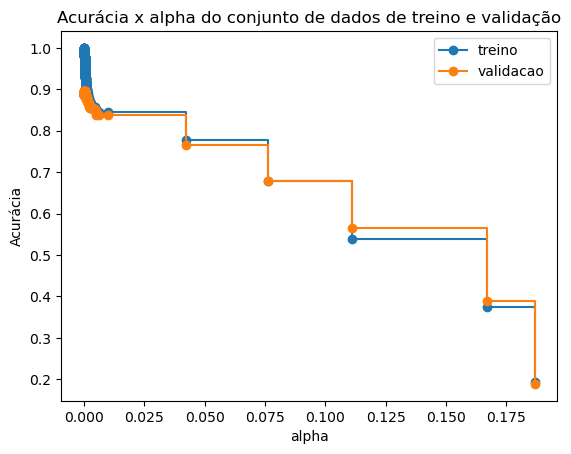

In [102]:
train_scores = [clf.score(x_treino, y_train) for clf in clfs]
valid_scores = [clf.score(x_validacao, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validacao",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 89.61


DecisionTreeClassifier(ccp_alpha=0.0002308174234180764, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 72.18


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


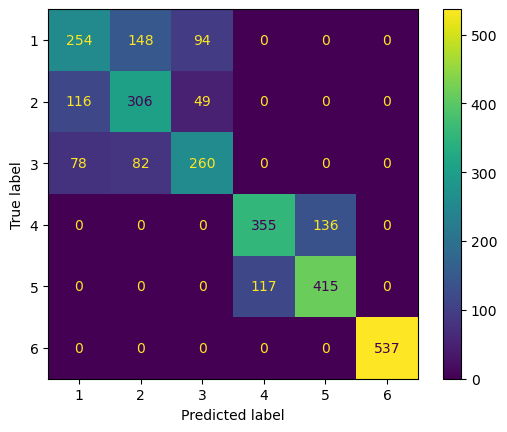

In [105]:
acuracia_teste = melhor_arvore.score(x_teste, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, x_teste, y_test);